# 1.0 - Context

Gamers Club is the largest CS:GO club in the world, and it`s expanding its horizons to embrace other games and gaming communities. Our platform has the largest active player base in Latin America, who play thousands of CS:GO matches every day.


One player can have multiple medals and matches associated

In [ ]:
huge thanks to - https://www.kaggle.com/code/gustavolatorresilva/eda-gc/notebook

mediplot - https://www.kaggle.com/thomaskonstantin
https://github.com/MuteJester/MediPlot

<img src="figs/Modelo-do-banco.png">

# 2.0 - Importing Libs

In [37]:
# install new libs
# %pip install MediPlot --upgrade

In [43]:
# custom lib
from libs.limpeza import *

# data manipulation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from MediPlot import BodyMap # bodymap plot


# setings
pd.set_option('display.max_columns', 100)

# warnings option
import warnings
warnings.filterwarnings('ignore')

# 3.0 - Reading Files 

In [44]:
lobby = pd.read_csv('data/tb_lobby_stats_player.csv')
medals = pd.read_csv('data/tb_medalha.csv')
players = pd.read_csv('data/tb_players.csv')
players_medals = pd.read_csv('data/tb_players_medalha.csv')

# 4.0 - Looking Player statistics

In [45]:
print(players.shape)
players.head()

(2716, 7)


,idPlayer,flFacebook,flTwitter,flTwitch,descCountry,dtBirth,dtRegistration
0,1,0,0,0,cl,NaN,2021-03-19 21:31:39
1,2,0,0,0,br,NaN,2020-05-06 19:28:29
2,3,0,0,0,br,NaN,2020-01-28 13:00:38
3,4,0,0,0,br,NaN,2017-05-31 16:13:51
4,5,0,0,0,ar,NaN,2021-02-08 11:57:21


# 4.1 - Players nationality

In [46]:
columns = ['country','qty_players']
qty_players_country = players.descCountry.value_counts(normalize= True) *100

qty_players_table = pd.DataFrame(qty_players_country).reset_index()
qty_players_table.columns = columns
qty_players_table

,country,qty_players
0,br,76.251841
1,ar,18.078056
2,cl,3.387334
3,uy,0.773196
4,pe,0.625920
5,us,0.368189
6,py,0.184094
7,bo,0.110457
8,ec,0.073638
9,ca,0.036819


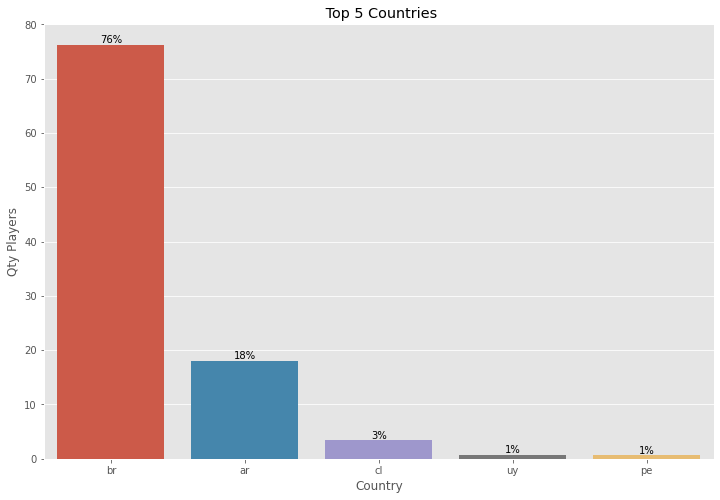

In [47]:

fig, ax = plt.subplots ( figsize = (12,8))

ax = sns.barplot(data = qty_players_table [:5], x = "country" , y = "qty_players" )
ax.bar_label(ax.containers[0], fmt='%.f%%')
ax.set_ylabel('%')
ax.set_title(f' Top 5 Countries')
ax.set_xlabel('Country')
ax.set_ylabel('Qty Players')
plt.show()

Most players are Brazilians (76%), folowed by Argentinians (18%) and than Chilenians (3%)

# 4.2 - Players and social media

In [6]:
(players[['flFacebook', 'flTwitter', 'flTwitch']].sum().sum() / players.shape[0] ) *100

5.89101620029455

Only 5.8% of players have Social Media accounts conected

In [7]:
(players[['flFacebook', 'flTwitter', 'flTwitch']].sum()/ players.shape[0] ) *100

flFacebook    2.319588
flTwitter     1.620029
flTwitch      1.951399
dtype: float64

Facebook is almost double the other two Social Media connections

# 4.3 - Players Age

In [8]:
# Creating an Age column based on date of birth
players['dtBirth'] = pd.to_datetime(players['dtBirth'])
players['age'] = 2022 - players['dtBirth'].dt.year

In [9]:
print(f'Younges: {players["age"].min()}')
print(f'Oldest: {players["age"].max()}')

Younges: 14.0
Oldest: 78.0


In [10]:
# verificando a média, mediana e moda das idades
print(f'''Age mean: {players['age'].mean()}
Age median: {players['age'].median()}
Age mode: {players['age'].mode()[0]}''')

Age mean: 24.26593625498008
Age median: 23.0
Age mode: 22.0


In [11]:
# missing data with age 
pd.DataFrame(players.age.isnull().value_counts())

,age
False,2008
True,708


we have 708 missing data to be filled with the median age

In [12]:
# filling N/A with median Age
# players.age = players.age.fillna(players.age.median()) # - Fill missing only after split or look to something

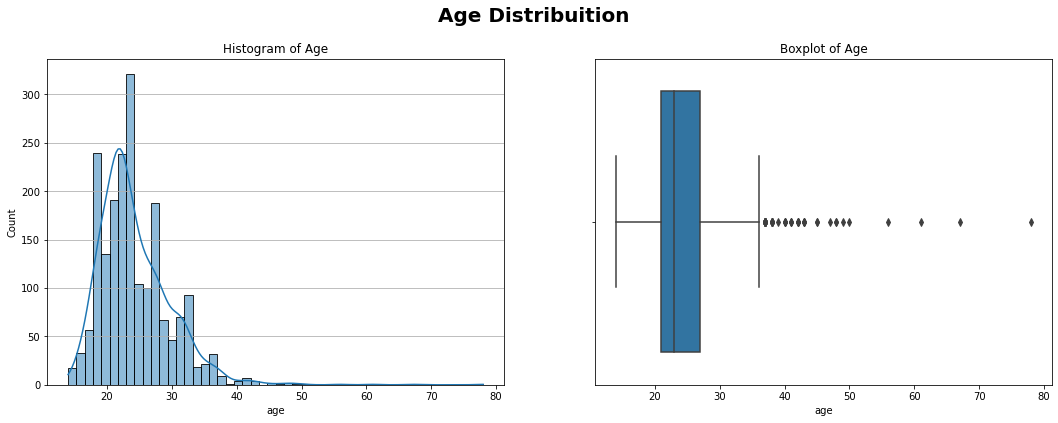

In [13]:
fig, ax = plt.subplots (1,2, figsize = (18,6))

fig.suptitle (f'Age Distribuition', fontsize = 20, fontweight = 'bold', y =1)
ax[0].set_title(f'Histogram of Age')
ax[1].set_title(f'Boxplot of Age')

# first plot
sns.histplot(data = players.age,bins = 50, kde=True, ax=ax[0])
ax[0].grid(axis = 'y')

# second plot 
ax = sns.boxplot(x=players.age, ax=ax[1])
plt.show()

In [14]:
# verificando a média, mediana e moda das idades
print(f'''Age mean: {players['age'].mean()}
Age median: {players['age'].median()}
Age mode: {players['age'].mode()[0]}''')

Age mean: 24.26593625498008
Age median: 23.0
Age mode: 22.0


# 4.4 - Account Age

In [15]:
# Creating an Age column based on date of birth
players['dtRegistration'] = pd.to_datetime(players['dtRegistration'])
players['account_age'] = 2022 - players['dtRegistration'].dt.year

In [16]:
# missing data with age 
players.account_age.isnull().value_counts()

False    2716
Name: account_age, dtype: int64

All missing ages were filled

In [17]:
# verifying a mean, median and monde das idades
print(f'''Age mean: {players.account_age.mean()}
Age median: {players.account_age.median()}
Age mode: {players.account_age.mode()[0]}''')

Age mean: 3.3457290132547866
Age median: 3.0
Age mode: 2


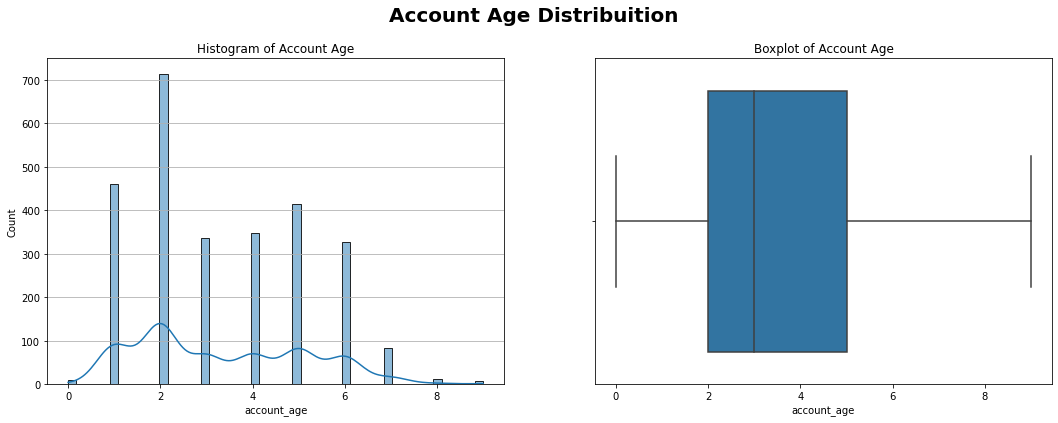

In [18]:
fig, ax = plt.subplots (1,2, figsize = (18,6))

fig.suptitle (f'Account Age Distribuition', fontsize = 20, fontweight = 'bold', y =1)
ax[0].set_title(f'Histogram of Account Age')
ax[1].set_title(f'Boxplot of Account Age')

# first plot
sns.histplot(data = players.account_age,bins = 50, kde=True, ax=ax[0])
ax[0].grid(axis = 'y')

# second plot 
ax = sns.boxplot(x=players.account_age, ax=ax[1])
plt.show()

- Gamers Club was Founded in 2015 and its popularity has grwon on past few years.
- Most accounts has account created on the lat 2 years.
- Mean account age is 3.34 years.
- We dont have much data on 2022 because the dataset was published on the begining of the year and was not updated

# 5.0 - Lobby Statistics

Now we are looking to the matches statistics

In [19]:
# sneak peak of the dataset
lobby.head()

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,qt3Kill,qt4Kill,qt5Kill,qtPlusKill,qtFirstKill,vlDamage,qtHits,qtShots,qtLastAlive,qtClutchWon,qtRoundsPlayed,descMapName,vlLevel,qtSurvived,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt
0,1,1,1,5,1,16,2,0,0,0.0,0.0,3,1,0,0,0,0,1,911,25.0,212,0.0,0,17,de_mirage,10,1.0,2.0,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0,2022-01-21 19:45:44
1,2,1,2,24,3,18,6,0,4,0.0,1.0,9,4,1,1,0,0,3,2933,54.0,597,1.0,1,27,de_nuke,9,8.0,1.0,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1,2022-02-04 02:09:47
2,3,2,3,6,4,23,2,0,1,0.0,1.0,4,1,0,0,0,0,2,1117,31.0,207,0.0,0,25,de_mirage,2,2.0,3.0,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0,2021-09-18 18:07:43
3,3,391,27508,10,5,20,4,1,0,0.0,0.0,6,2,0,0,0,0,1,1740,63.0,411,1.0,1,25,de_mirage,15,3.0,4.0,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1,2021-09-18 18:07:43
4,4,2,4,8,4,26,6,0,2,0.0,0.0,4,2,0,0,0,0,1,1696,51.0,324,0.0,0,30,de_nuke,2,4.0,4.0,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0,2021-09-27 00:17:45


There are a few columns that are not intersting to our analysis, so we are going to remove them to make thigs easier and faster.

In [20]:
lobby.columns

Index(['idLobbyGame', 'idPlayer', 'idRoom', 'qtKill', 'qtAssist', 'qtDeath',
       'qtHs', 'qtBombeDefuse', 'qtBombePlant', 'qtTk', 'qtTkAssist',
       'qt1Kill', 'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtPlusKill',
       'qtFirstKill', 'vlDamage', 'qtHits', 'qtShots', 'qtLastAlive',
       'qtClutchWon', 'qtRoundsPlayed', 'descMapName', 'vlLevel', 'qtSurvived',
       'qtTrade', 'qtFlashAssist', 'qtHitHeadshot', 'qtHitChest',
       'qtHitStomach', 'qtHitLeftAtm', 'qtHitRightArm', 'qtHitLeftLeg',
       'qtHitRightLeg', 'flWinner', 'dtCreatedAt'],
      dtype='object')

In [21]:
# looking to table infos
lobby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184152 entries, 0 to 184151
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   idLobbyGame     184152 non-null  int64  
 1   idPlayer        184152 non-null  int64  
 2   idRoom          184152 non-null  int64  
 3   qtKill          184152 non-null  int64  
 4   qtAssist        184152 non-null  int64  
 5   qtDeath         184152 non-null  int64  
 6   qtHs            184152 non-null  int64  
 7   qtBombeDefuse   184152 non-null  int64  
 8   qtBombePlant    184152 non-null  int64  
 9   qtTk            184032 non-null  float64
 10  qtTkAssist      184032 non-null  float64
 11  qt1Kill         184152 non-null  int64  
 12  qt2Kill         184152 non-null  int64  
 13  qt3Kill         184152 non-null  int64  
 14  qt4Kill         184152 non-null  int64  
 15  qt5Kill         184152 non-null  int64  
 16  qtPlusKill      184152 non-null  int64  
 17  qtFirstKil

# 5.1 - Maps

In [22]:
columns = ['Map Name','Matches Count']
matches_by_map = pd.DataFrame(lobby.descMapName.value_counts()).reset_index() 
matches_by_map.columns = columns

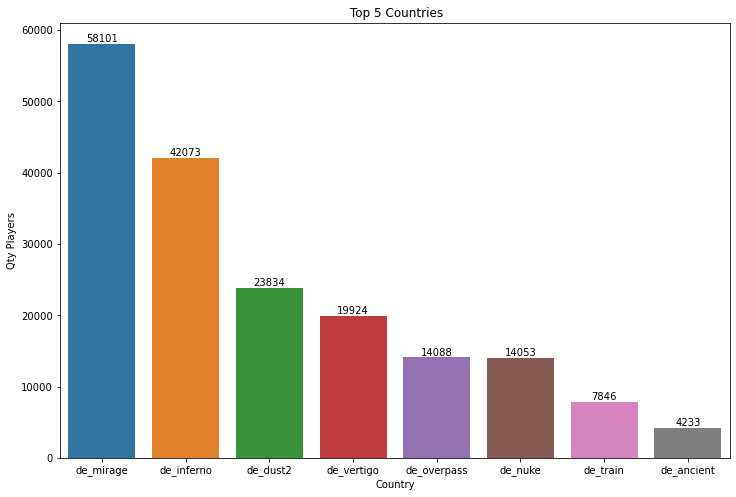

In [23]:
fig, ax = plt.subplots ( figsize = (12,8))

ax = sns.barplot(data = matches_by_map , x = "Map Name" , y = "Matches Count" )
ax.bar_label(ax.containers[0], fmt='%.f')
ax.set_ylabel('%')
ax.set_title(f' Top 5 Countries')
ax.set_xlabel('Country')
ax.set_ylabel('Qty Players')
plt.show()

- Maps with most played matches are Mirage with 58101 games, Inferno with 41073 and Dust2 with 23834 games.
- Maps are most familiar to most playes and easier to play with.

# 4.5 - Players who play the most

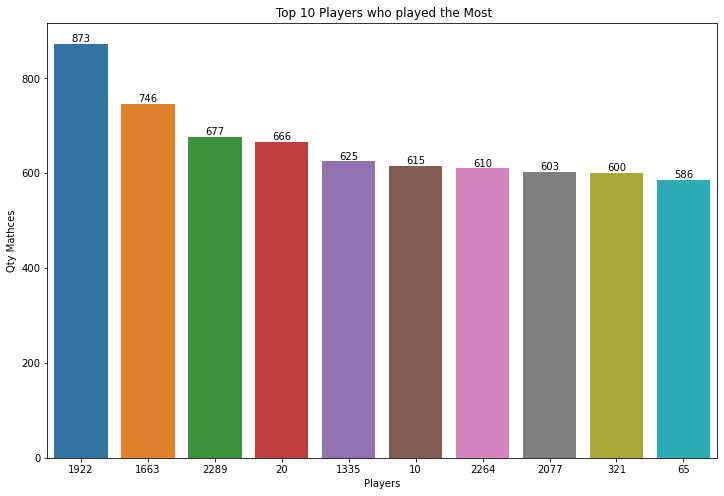

In [24]:
# calculating the number of matches to each user
columns = ['idPlayer','Matches Count']
matches_by_id = pd.DataFrame(lobby.idPlayer.value_counts()).reset_index() 
matches_by_id.columns = columns

fig, ax = plt.subplots ( figsize = (12,8))

ax = sns.barplot(data = matches_by_id[:10],
                 x = "idPlayer" ,
                 y = "Matches Count",
                 order= matches_by_id.sort_values('Matches Count', ascending= False)['idPlayer'][:10] )

ax.bar_label(ax.containers[0], fmt='%.f')
ax.set_ylabel('%')
ax.set_title(f' Top 10 Players who played the Most')
ax.set_xlabel('Players')
ax.set_ylabel('Qty Mathces')

plt.show()

In [25]:
# Number of times of defused 
maps_bombs = lobby.groupby(by='descMapName', as_index=False)[['qtBombePlant', 'qtBombeDefuse']].sum()
maps_bombs['undefused']= maps_bombs.qtBombePlant - maps_bombs.qtBombeDefuse
maps_bombs['defuse_rate']= (maps_bombs.qtBombeDefuse/maps_bombs.qtBombePlant) * 100
maps_bombs


,descMapName,qtBombePlant,qtBombeDefuse,undefused,defuse_rate
0,de_ancient,6151,1667,4484,27.101284
1,de_dust2,32143,7448,24695,23.171453
2,de_inferno,59433,12959,46474,21.804385
3,de_mirage,72842,17384,55458,23.865352
4,de_nuke,17909,4848,13061,27.070188
5,de_overpass,18242,4353,13889,23.862515
6,de_train,10139,3085,7054,30.427064
7,de_vertigo,26470,6458,20012,24.397431


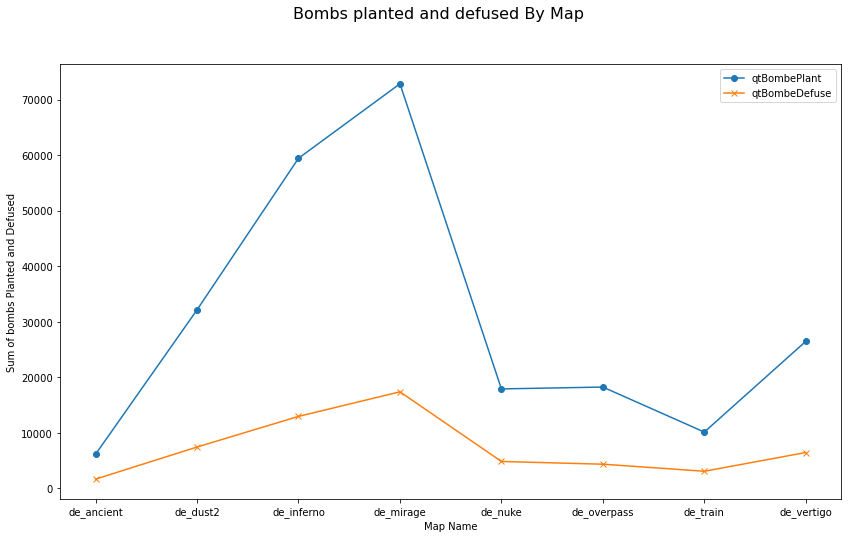

In [26]:
# creating multiples plots to compare with 
fig, ax = plt.subplots(figsize=(14,8))

ax.plot(maps_bombs['descMapName'],
           maps_bombs['qtBombePlant'],
           marker='o')

ax.plot(maps_bombs['descMapName'],
           maps_bombs['qtBombeDefuse'],
           marker='x')
ax.set_xlabel('Map Name') 
ax.set_ylabel('Sum of bombs Planted and Defused') 

ax.legend(['qtBombePlant', 'qtBombeDefuse'])


fig.suptitle('Bombs planted and defused By Map', fontsize=16)

plt.show()

In [27]:
# defuse rate to all datasets
maps_bombs.defuse_rate.mean()

25.21245902587275

- Overall bomb defuse rate is 25%.
- Mirrage has the mose undefused bombs, 55458 bombs undefused.
- Train has the most defused bombs, the rate is 30% of bombs planted.

# 5.2 - Most hit body parts

In [28]:
lobby.shape

(184152, 38)

In [29]:
# summing all the hits different body parts
shots_bodypart = lobby[['qtHitHeadshot', 'qtHitChest',
       'qtHitStomach', 'qtHitLeftAtm', 'qtHitRightArm', 'qtHitLeftLeg',
       'qtHitRightLeg']].sum()
percent_shots_bodypart = (shots_bodypart / shots_bodypart.sum()) *100

In [30]:
# creating a table withh number of shots and percentage in each body part
tb_freq_shot_bodyparts = pd.DataFrame({'shots':shots_bodypart, 'percentage':percent_shots_bodypart}).reset_index()
tb_freq_shot_bodyparts.rename(columns={'index':'bodyPart'}, inplace = True)
tb_freq_shot_bodyparts

,bodyPart,shots,percentage
0,qtHitHeadshot,1768959.0,15.009709
1,qtHitChest,5375950.0,45.615214
2,qtHitStomach,2481214.0,21.053229
3,qtHitLeftAtm,349010.0,2.961368
4,qtHitRightArm,936697.0,7.947922
5,qtHitLeftLeg,415625.0,3.526600
6,qtHitRightLeg,457977.0,3.885959


In [31]:
# ploting list of possible targets if some tweek is needed 
# BodyMap().list_of_targets()

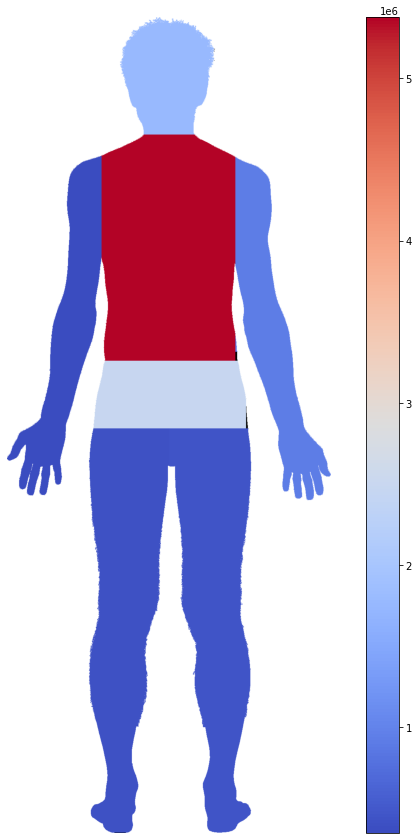

In [32]:
values = lobby[['qtHitHeadshot','qtHitHeadshot', 'qtHitChest','qtHitStomach', 'qtHitLeftAtm', 'qtHitRightArm', 'qtHitLeftLeg','qtHitRightLeg']].sum()
ax = BodyMap().generate(areas=['head', 'neck', 'torso','waist','left arm','right arm','left leg','right leg'],
                        values= values ,cmap='coolwarm',background='white')
plt.show()

- From herer we can see that the body part which is more likely to be shot is the Chest (45%), and stomach(21%) and Head (15%)
- Headshots are preferable because they lead to a faster kill
- Left Arm is less likely to be shot (Any sugestion on this ?)

# 5.3 - Player level and its implications

Quantity of Team Kills (qtTk) is the number of times a teamate was hit by friendly fire.

Quantity of Death (qtDeath) is the number of times a player got killed in a match.

Quantity of Kills (qtKill) is the number of times a player killed other.

Level (vlLevel) is ther ranking a player has in Gamers Club

In [33]:
level_stats = lobby.groupby(by='vlLevel', as_index=False)[['qtKill', 'qtDeath', 'qtTk']].mean()
level_stats['qtTk'] = level_stats['qtTk'] * 100
level_stats

,vlLevel,qtKill,qtDeath,qtTk
0,0,16.507096,17.097446,2.175970
1,1,11.794872,18.145299,2.991453
2,2,11.846970,18.433333,3.181818
3,3,13.221401,18.349282,4.045237
4,4,14.373259,18.639972,3.382148
5,5,15.418986,18.708713,2.263856
6,6,16.106348,18.725931,2.977028
7,7,16.265135,18.381065,2.793296
8,8,17.098773,18.490801,2.600129
9,9,17.772336,18.481837,2.575857


In [34]:
level_stats.corr()

,vlLevel,qtKill,qtDeath,qtTk
vlLevel,1.000000,0.929366,0.503130,-0.606434
qtKill,0.929366,1.000000,0.236651,-0.609428
qtDeath,0.503130,0.236651,1.000000,-0.397301
qtTk,-0.606434,-0.609428,-0.397301,1.000000


<AxesSubplot:>

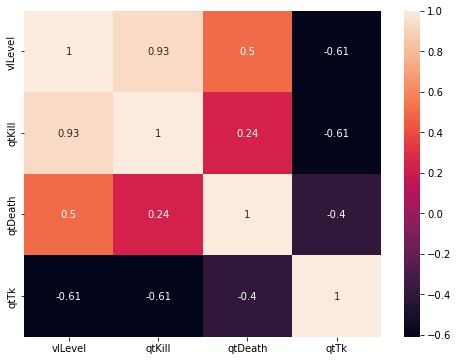

In [35]:
# ploting correlation matrix to studied variables
fig, ax = plt.subplots ( figsize = (8,6))

sns.heatmap(level_stats.corr(), annot= True)

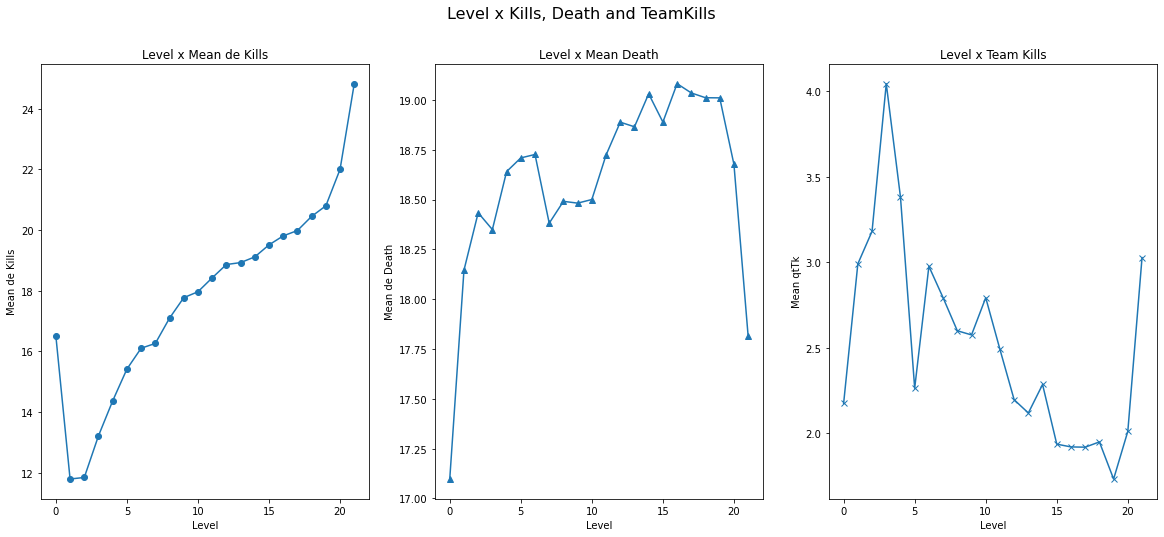

In [36]:
# creating multiples plots to compare with 
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,8))

ax[0].plot(level_stats['vlLevel'],
           level_stats['qtKill'],
           marker='o')
ax[0].set_xlabel('Level') 
ax[0].set_ylabel('Mean de Kills') 
ax[0].set_title('Level x Mean de Kills') 

ax[1].plot(level_stats['vlLevel'],
           level_stats['qtDeath'],
           marker='^')
ax[1].set_xlabel('Level') 
ax[1].set_ylabel('Mean de Death') 
ax[1].set_title('Level x Mean Death')

ax[2].plot(level_stats['vlLevel'],
           level_stats['qtTk'],
           marker='x')
ax[2].set_xlabel('Level') 
ax[2].set_ylabel('Mean qtTk') 
ax[2].set_title('Level x Team Kills')

fig.suptitle('Level x Kills, Death and TeamKills', fontsize=16)

plt.show()


- We can observe a negative correlation between the variables, meaning that higher the Player Level the less likely they are to shoot a teammate.
- A hiegher ranked player kills more in a match.
- A hihger rangked playert dies less in a match. 
- Players have to play more to be higher ranked, so the deaths increase before they drop.
- A more experienced player kwnos how to indetify their teamates and shoots beter.

# 6.0 - Medals

# 6.1 - Premium Players

Ther are three types of subcriptin, Free, Plus and Premium. They increase in price and benefits. 

In [37]:
# filtering premium players
premium_players = players_medals[players_medals.idMedal.isin([1,3]) & players_medals.flActive == 1][['idPlayer','idMedal']]

In [38]:
# calculating the number of players in each subscription model
players_premium_status = pd.merge(left= players, right= premium_players,how='left', on="idPlayer")[['idPlayer', 'idMedal']]
# all non premium players use free subscription, that will be filled with 0
players_premium_status.fillna(0, inplace= True)
players_premium_status.idMedal.replace([0,1,3],['Free','Membro Premium', 'Membro Plus'], inplace= True)

subscription_status = pd.DataFrame({'players':players_premium_status.idMedal.value_counts(),
                                    'percentage':players_premium_status.idMedal.value_counts(normalize= True) * 100}).reset_index()
subscription_status.rename(columns={'index':'subscription'}, inplace = True)
subscription_status

,subscription,players,percentage
0,Free,2095,77.135493
1,Membro Plus,441,16.237113
2,Membro Premium,180,6.627393


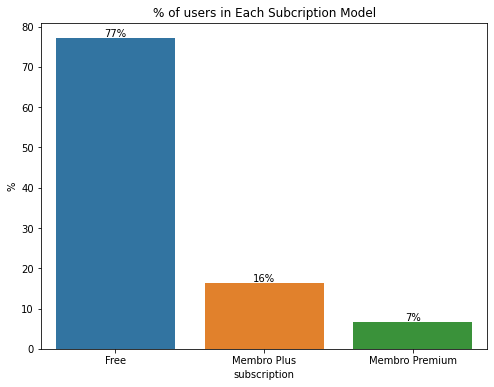

In [39]:
fig, ax = plt.subplots (figsize = (8,6))

ax = sns.barplot(data = subscription_status,
                 x = "subscription" ,
                 y = "percentage",
                 order = subscription_status.sort_values('percentage', ascending= False)['subscription'])
ax.bar_label(ax.containers[0], fmt='%.f%%')
ax.set_ylabel('%')
ax.set_title(f'% of users in Each Subcription Model')
# ax.set_xlabel('Players')
# ax.set_ylabel('Qty Mathces')

plt.show()

# 6.2 - Higher Ranking players are premium ?

In [40]:
level_subscription = pd.merge(left= lobby, right= premium_players,how='left', on="idPlayer")[['vlLevel', 'idMedal']]
level_subscription.idMedal.fillna(0, inplace=True)
level_subscription.idMedal.replace([0,1,3],['Free','Membro Premium', 'Membro Plus'], inplace= True)

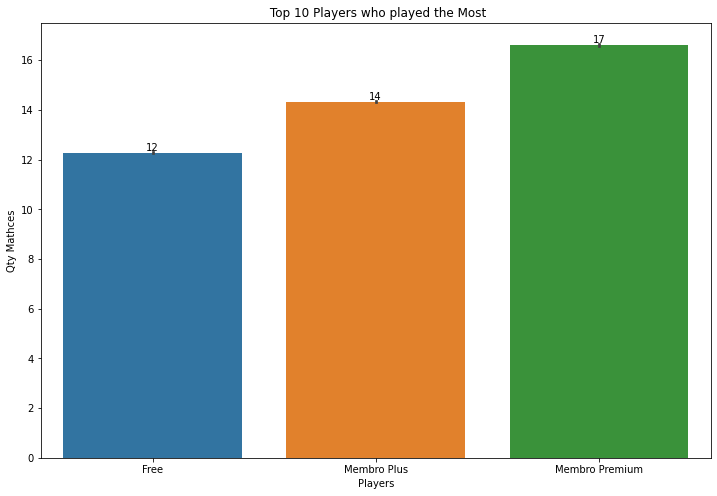

In [41]:
# calculating the number of matches to each user
fig, ax = plt.subplots ( figsize = (12,8))

ax = sns.barplot(data = level_subscription,
                 x = "idMedal" ,
                 y = "vlLevel")

ax.bar_label(ax.containers[0], fmt='%.f')
ax.set_ylabel('%')
ax.set_title(f' Top 10 Players who played the Most')
ax.set_xlabel('Players')
ax.set_ylabel('Qty Mathces')

plt.show()

In [42]:
pd.get_dummies(level_subscription, columns=['idMedal']).corr()

,vlLevel,idMedal_Free,idMedal_Membro Plus,idMedal_Membro Premium
vlLevel,1.000000,-0.305862,0.095763,0.287346
idMedal_Free,-0.305862,1.000000,-0.695289,-0.470128
idMedal_Membro Plus,0.095763,-0.695289,1.000000,-0.307475
idMedal_Membro Premium,0.287346,-0.470128,-0.307475,1.000000
